# Import Data & Packages

In [1]:
import time 
import matplotlib.pyplot as plt
import scipy
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, shutil
import pickle
from shutil import copyfile


import talos


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.activations import *



np.random.seed(123)

Using TensorFlow backend.


In [2]:
#import the datasets

train_y = pickle.load(open("train_stanford_y.pkl", "rb" ) )
test_y = pickle.load(open("test_stanford_y.pkl", "rb" ) )
val_y = pickle.load(open("val_stanford_y.pkl", "rb" ) )

train_img = pickle.load(open("train_stanford_img.pkl", "rb" ) )
test_img = pickle.load(open("test_stanford_img.pkl", "rb" ) )
val_img = pickle.load(open("val_stanford_img.pkl", "rb" ) )

train_images = pickle.load(open("train_stanford_images.pkl", "rb" ) )
test_images = pickle.load(open("test_stanford_images.pkl", "rb" ) )
validate_images = pickle.load(open("validate_stanford_images.pkl", "rb" ) )

train_labels = pickle.load(open("train_stanford_labels.pkl", "rb" ) )
test_labels = pickle.load(open("test_stanford_labels.pkl", "rb" ) )
validate_labels = pickle.load(open("val_stanford_labels.pkl", "rb" ) )

# Baseline Models - 1 VGG Block

We will now build our model using this method: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/. Beginning with 1 VGG block, as was created in a competition etc 

In [3]:
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 241s 551ms/step - loss: 3.6134 - accuracy: 0.0325 - val_loss: 3.5907 - val_accuracy: 0.0402
Epoch 2/30
436/436 [==============================] - 246s 562ms/step - loss: 3.5773 - accuracy: 0.0523 - val_loss: 3.5343 - val_accuracy: 0.0571
Epoch 3/30
436/436 [==============================] - 230s 528ms/step - loss: 3.4961 - accuracy: 0.0723 - val_loss: 3.4295 - val_accuracy: 0.0806
Epoch 4/30
436/436 [==============================] - 232s 533ms/step - loss: 3.3838 - accuracy: 0.0952 - val_loss: 3.3764 - val_accuracy: 0.0943
Epoch 5/30
436/436 [==============================] - 229s 524ms/step - loss: 3.3045 - accuracy: 0.1139 - val_loss: 3.3463 - val_accuracy: 0.0980
Epoch 6/30
436/436 [==============================] - 229s 524ms/step - loss: 3.2200 - accuracy: 0.1379 - val_loss: 3.3095 - val_accuracy: 0.1120
Epoch 7/30
436/436 [==============================] - 228s 523ms/step - loss: 3.1315 - accuracy: 0.1557 - val_loss: 3.3116 -

In [5]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 8s 73ms/step - loss: 2.9025 - accuracy: 0.2335


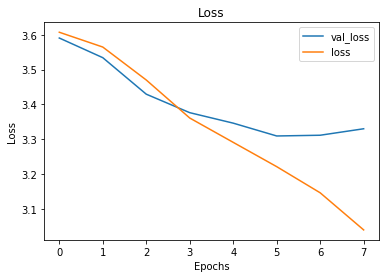

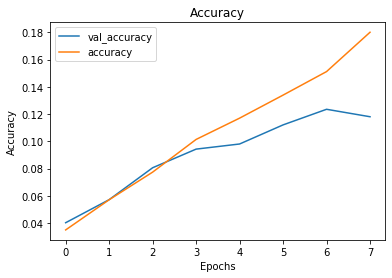

In [6]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
visualize_training_results(history)

In [ ]:
#Accuracy: 22%
#Loss 2.8-2.9
#Signs of some overfitting

# Model 2 - 2 VGG Blocks

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 368s 844ms/step - loss: 3.6117 - accuracy: 0.0317 - val_loss: 3.5786 - val_accuracy: 0.0453
Epoch 2/30
436/436 [==============================] - 369s 847ms/step - loss: 3.5485 - accuracy: 0.0535 - val_loss: 3.4922 - val_accuracy: 0.0761
Epoch 3/30
436/436 [==============================] - 370s 848ms/step - loss: 3.4413 - accuracy: 0.0803 - val_loss: 3.4134 - val_accuracy: 0.0941
Epoch 4/30
436/436 [==============================] - 368s 843ms/step - loss: 3.3157 - accuracy: 0.1131 - val_loss: 3.3562 - val_accuracy: 0.1095
Epoch 5/30
436/436 [==============================] - 357s 819ms/step - loss: 3.1899 - accuracy: 0.1484 - val_loss: 3.3051 - val_accuracy: 0.1201
Epoch 6/30
436/436 [==============================] - 357s 820ms/step - loss: 3.0184 - accuracy: 0.1943 - val_loss: 3.2358 - val_accuracy: 0.1370
Epoch 7/30
436/436 [==============================] - 363s 834ms/step - loss: 2.7446 - accuracy: 0.2615 - val_loss: 3.3100 -

In [9]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 17s 160ms/step - loss: 1.6967 - accuracy: 0.5874


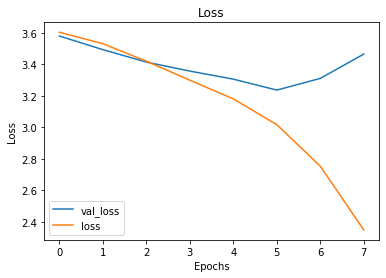

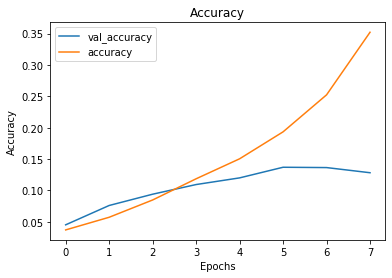

In [10]:
visualize_training_results(history)

In [ ]:
#Accuracy: 
#Loss:
#Signs of some overfitting

# Model 3 - 3 VGG Blocks

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 459s 1s/step - loss: 3.6149 - accuracy: 0.0268 - val_loss: 3.5985 - val_accuracy: 0.0433
Epoch 2/30
436/436 [==============================] - 460s 1s/step - loss: 3.5845 - accuracy: 0.0454 - val_loss: 3.5417 - val_accuracy: 0.0508
Epoch 3/30
436/436 [==============================] - 452s 1s/step - loss: 3.5142 - accuracy: 0.0597 - val_loss: 3.4819 - val_accuracy: 0.0686
Epoch 4/30
436/436 [==============================] - 450s 1s/step - loss: 3.4008 - accuracy: 0.0857 - val_loss: 3.3697 - val_accuracy: 0.0946
Epoch 5/30
436/436 [==============================] - 448s 1s/step - loss: 3.2419 - accuracy: 0.1233 - val_loss: 3.2929 - val_accuracy: 0.1114
Epoch 6/30
436/436 [==============================] - 453s 1s/step - loss: 3.0661 - accuracy: 0.1630 - val_loss: 3.2862 - val_accuracy: 0.1280
Epoch 7/30
436/436 [==============================] - 449s 1s/step - loss: 2.8342 - accuracy: 0.2261 - val_loss: 3.2592 - val_accuracy: 0.1305

In [12]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 23s 208ms/step - loss: 1.1688 - accuracy: 0.6967


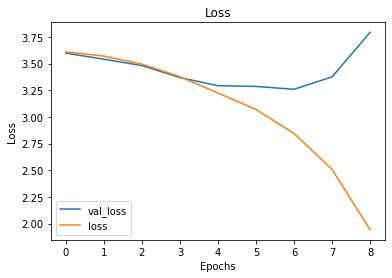

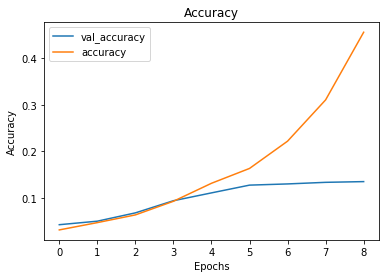

In [13]:
visualize_training_results(history)

# Model 4 - Dropout Regularization

Our previous models demonstrate strong accuracy scores, but show signs of overfitting (diverging lines in output charts).  

In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 448s 1s/step - loss: 3.7364 - accuracy: 0.0265 - val_loss: 3.6086 - val_accuracy: 0.0330
Epoch 2/30
436/436 [==============================] - 460s 1s/step - loss: 3.6036 - accuracy: 0.0303 - val_loss: 3.5897 - val_accuracy: 0.0405
Epoch 3/30
436/436 [==============================] - 455s 1s/step - loss: 3.5787 - accuracy: 0.0455 - val_loss: 3.5680 - val_accuracy: 0.0496
Epoch 4/30
436/436 [==============================] - 455s 1s/step - loss: 3.5485 - accuracy: 0.0532 - val_loss: 3.5261 - val_accuracy: 0.0547
Epoch 5/30
436/436 [==============================] - 434s 997ms/step - loss: 3.5212 - accuracy: 0.0618 - val_loss: 3.5181 - val_accuracy: 0.0631
Epoch 6/30
436/436 [==============================] - 434s 996ms/step - loss: 3.4886 - accuracy: 0.0640 - val_loss: 3.4822 - val_accuracy: 0.0686
Epoch 7/30
436/436 [==============================] - 432s 992ms/step - loss: 3.4502 - accuracy: 0.0785 - val_loss: 3.4390 - val_accurac

In [15]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 20s 185ms/step - loss: 1.8628 - accuracy: 0.5299


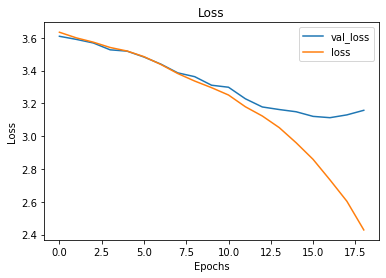

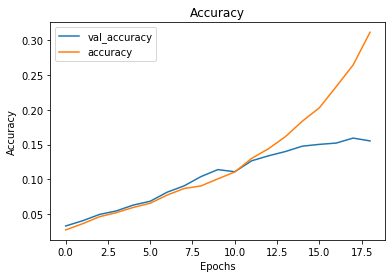

In [16]:
visualize_training_results(history)

# Model 5 - Weight Decay

In [17]:
from tensorflow.keras.regularizers import l2 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001),input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 424s 971ms/step - loss: 4.7786 - accuracy: 0.0301 - val_loss: 4.7222 - val_accuracy: 0.0411
Epoch 2/30
436/436 [==============================] - 416s 954ms/step - loss: 4.6854 - accuracy: 0.0539 - val_loss: 4.5702 - val_accuracy: 0.0828
Epoch 3/30
436/436 [==============================] - 413s 948ms/step - loss: 4.4793 - accuracy: 0.0971 - val_loss: 4.4142 - val_accuracy: 0.1150
Epoch 4/30
436/436 [==============================] - 413s 946ms/step - loss: 4.3279 - accuracy: 0.1340 - val_loss: 4.3766 - val_accuracy: 0.1204
Epoch 5/30
436/436 [==============================] - 413s 948ms/step - loss: 4.1386 - accuracy: 0.1735 - val_loss: 4.3174 - val_accuracy: 0.1331
Epoch 6/30
436/436 [==============================] - 414s 949ms/step - loss: 3.9041 - accuracy: 0.2201 - val_loss: 4.3163 - val_accuracy: 0.1432
Epoch 7/30
436/436 [==============================] - 414s 950ms/step - loss: 3.5657 - accuracy: 0.3028 - val_loss: 4.2764 -

In [18]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 20s 180ms/step - loss: 1.7342 - accuracy: 0.8430


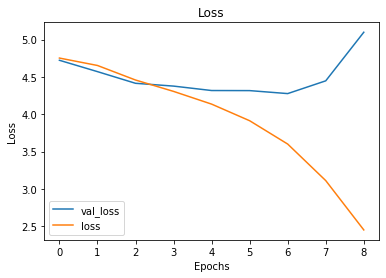

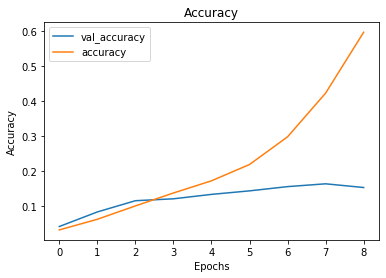

In [19]:
visualize_training_results(history)

In [20]:
#weight decay outperformed dropout regularization. Tuning

# Model 6 - Weight Decay & Dropout

In [21]:
from tensorflow.keras.regularizers import l2 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01),input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 425s 972ms/step - loss: 14.7029 - accuracy: 0.0304 - val_loss: 13.3183 - val_accuracy: 0.0400
Epoch 2/30
436/436 [==============================] - 427s 978ms/step - loss: 12.9054 - accuracy: 0.0379 - val_loss: 11.7372 - val_accuracy: 0.0614
Epoch 3/30
436/436 [==============================] - 412s 945ms/step - loss: 11.3722 - accuracy: 0.0579 - val_loss: 10.3454 - val_accuracy: 0.0694
Epoch 4/30
436/436 [==============================] - 407s 934ms/step - loss: 10.0236 - accuracy: 0.0812 - val_loss: 9.1961 - val_accuracy: 0.0883
Epoch 5/30
436/436 [==============================] - 406s 932ms/step - loss: 8.8748 - accuracy: 0.1073 - val_loss: 8.2227 - val_accuracy: 0.1102
Epoch 6/30
436/436 [==============================] - 406s 931ms/step - loss: 7.9160 - accuracy: 0.1268 - val_loss: 7.4125 - val_accuracy: 0.1189
Epoch 7/30
436/436 [==============================] - 406s 930ms/step - loss: 7.0935 - accuracy: 0.1619 - val_loss: 6

In [22]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 21s 189ms/step - loss: 2.6435 - accuracy: 0.8315


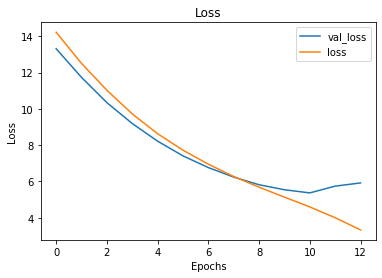

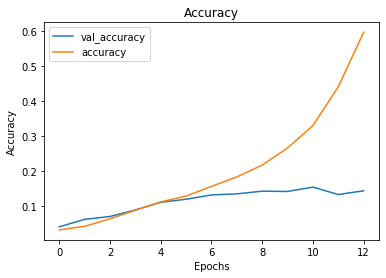

In [23]:
visualize_training_results(history)

# Model 7 - Modified Weight Decay with Dropout

In [24]:
from tensorflow.keras.regularizers import l2 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01),input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 450s 1s/step - loss: 14.7687 - accuracy: 0.0288 - val_loss: 13.3197 - val_accuracy: 0.0246
Epoch 2/30
436/436 [==============================] - 452s 1s/step - loss: 12.9119 - accuracy: 0.0280 - val_loss: 11.7632 - val_accuracy: 0.0351
Epoch 3/30
436/436 [==============================] - 449s 1s/step - loss: 11.4203 - accuracy: 0.0297 - val_loss: 10.4562 - val_accuracy: 0.0330
Epoch 4/30
436/436 [==============================] - 444s 1s/step - loss: 10.1684 - accuracy: 0.0250 - val_loss: 9.3590 - val_accuracy: 0.0253
Epoch 5/30
436/436 [==============================] - 438s 1s/step - loss: 9.1174 - accuracy: 0.0295 - val_loss: 8.4378 - val_accuracy: 0.0313
Epoch 6/30
436/436 [==============================] - 436s 1000ms/step - loss: 8.2348 - accuracy: 0.0329 - val_loss: 7.6642 - val_accuracy: 0.0318
Epoch 7/30
436/436 [==============================] - 436s 1000ms/step - loss: 7.4938 - accuracy: 0.0290 - val_loss: 7.0145 - val_a

In [25]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 20s 187ms/step - loss: 3.6721 - accuracy: 0.0270


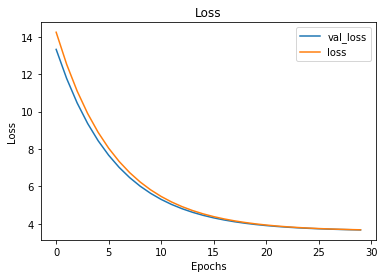

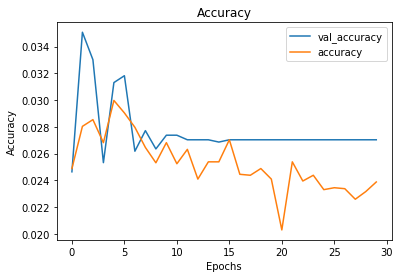

In [26]:
visualize_training_results(history)

# Model 8 - Tuning Weight Decay & Dropout

In [27]:
from tensorflow.keras.regularizers import l2 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01),input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))


model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(37, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/10
436/436 [==============================] - 451s 1s/step - loss: 14.7208 - accuracy: 0.0262 - val_loss: 13.3044 - val_accuracy: 0.0243
Epoch 2/10
436/436 [==============================] - 437s 1s/step - loss: 12.8974 - accuracy: 0.0253 - val_loss: 11.7504 - val_accuracy: 0.0274
Epoch 3/10
436/436 [==============================] - 428s 981ms/step - loss: 11.4084 - accuracy: 0.0254 - val_loss: 10.4453 - val_accuracy: 0.0265
Epoch 4/10
436/436 [==============================] - 429s 984ms/step - loss: 10.1580 - accuracy: 0.0269 - val_loss: 9.3497 - val_accuracy: 0.0306
Epoch 5/10
436/436 [==============================] - 429s 984ms/step - loss: 9.1084 - accuracy: 0.0290 - val_loss: 8.4298 - val_accuracy: 0.0340
Epoch 6/10
436/436 [==============================] - 429s 983ms/step - loss: 8.2273 - accuracy: 0.0294 - val_loss: 7.6573 - val_accuracy: 0.0327
Epoch 7/10
436/436 [==============================] - 428s 983ms/step - loss: 7.4872 - accuracy: 0.0306 - val_loss: 7.0087 

In [28]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 20s 187ms/step - loss: 5.6225 - accuracy: 0.0339


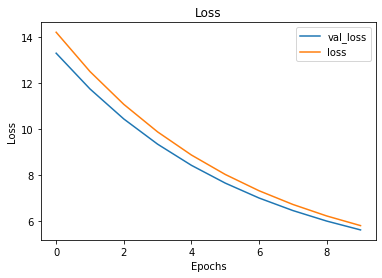

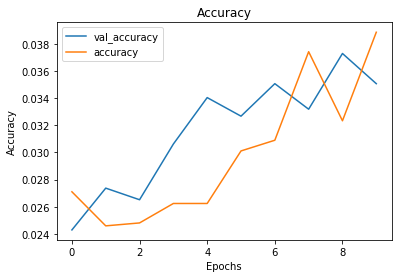

In [29]:
visualize_training_results(history)

# Model 9 - Tuning Dropout Regularization

In [31]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(37, activation='softmax'))

# compile model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)


history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images, validate_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
436/436 [==============================] - 455s 1s/step - loss: 3.8140 - accuracy: 0.0275 - val_loss: 3.6106 - val_accuracy: 0.0270
Epoch 2/30
436/436 [==============================] - 448s 1s/step - loss: 3.6092 - accuracy: 0.0315 - val_loss: 3.5854 - val_accuracy: 0.0467
Epoch 3/30
436/436 [==============================] - 447s 1s/step - loss: 3.5706 - accuracy: 0.0468 - val_loss: 3.5281 - val_accuracy: 0.0694
Epoch 4/30
436/436 [==============================] - 450s 1s/step - loss: 3.4997 - accuracy: 0.0646 - val_loss: 3.4793 - val_accuracy: 0.0811
Epoch 5/30
436/436 [==============================] - 475s 1s/step - loss: 3.4422 - accuracy: 0.0750 - val_loss: 3.4303 - val_accuracy: 0.0939
Epoch 6/30
436/436 [==============================] - 467s 1s/step - loss: 3.3766 - accuracy: 0.0980 - val_loss: 3.3647 - val_accuracy: 0.1091
Epoch 7/30
436/436 [==============================] - 447s 1s/step - loss: 3.2982 - accuracy: 0.1084 - val_loss: 3.3296 - val_accuracy: 0.1180

In [32]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

109/109 [==============================] - 20s 185ms/step - loss: 1.9610 - accuracy: 0.4917


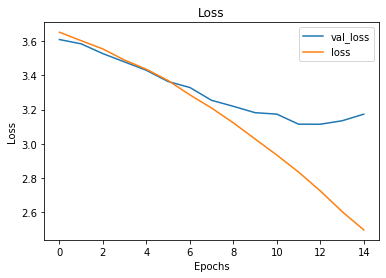

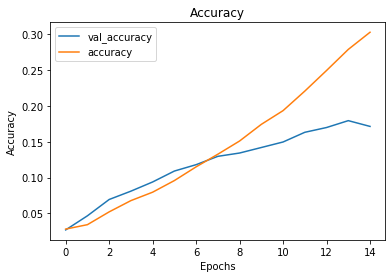

In [33]:
visualize_training_results(history)

# Conclusion

The best model generated is Model 4 - the original dropout regularization model. The accuracy of this model was 55% for our training data and 53% for our test data. Loss was roughly 1.8 for both groups. 

While some of our other models demonstrated greater accuracy, like Model 5 which had an ~86% accuracy, all of our models demonstrated more overfitting.

## Next Steps

As we continue work to improve our model, we will look to do the following:

- Increase the size of our dataset. We saw strong improvements after combining our data with the Stanford Dog dataset.


- Test leveraging K-fold cross validation to improve our model. This may help prevent some of the overfitting we're seeing.


- Once we have an improved model, we should try to expand our model to provide predictions for mixed-breed dogs. 